# **Preprocessing Using scikit-learn**

In [33]:
import pandas as pd
import numpy as np
file_path = 'E:\\BytewiseIntersnhip\\Task30\\bank-full.csv'
df = pd.read_csv(file_path, delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### **Replace 'unknown' values with NaN**

In [35]:
df_cleaned = df.copy()
df_cleaned.replace('unknown', np.nan, inplace=True)
df_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


### **Check for missing values**

In [36]:
missing_values = df_cleaned.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


### **Identify numerical and categorical features**

In [37]:
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df_cleaned.select_dtypes(include=['object']).columns

print("Numerical features:")
print(numerical_features)
print("\nCategorical features:")
print(categorical_features)

Numerical features:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Categorical features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


# **`SimpleImputer` in `sklearn.impute`**

The `SimpleImputer` class is used to fill missing values in datasets.

## **Key Parameters**

- **`missing_values`**: The placeholder for missing values (default: `np.nan`).
- **`strategy`**: Method for imputation:
  - `'mean'`: Replace with column mean
  - `'median'`: Replace with column median
  - `'most_frequent'`: Replace with most frequent value
  - `'constant'`: Replace with a constant value (`fill_value`)
- **`fill_value`**: Value used if `strategy='constant'` (default: `None`).
- **`copy`**: Whether to copy the data (default: `True`).
- **`add_indicator`**: If `True`, adds a column indicating missing values (default: `False`).
- **`keep_empty_features`**: If `True`, keeps features that are all missing (default: `False`).


### **Handle missing values in Numerical Featutes**

In [41]:
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy='median')
df_cleaned[numerical_features] = numerical_imputer.fit_transform(df_cleaned[numerical_features])

print("Numerical features after imputation:")
df_cleaned[numerical_features].head()


Numerical features after imputation:


,age,balance,day,duration,campaign,pdays,previous
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0
3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0
4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0


### **Handle missing values in Categorical Featutes**

In [42]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[categorical_features] = categorical_imputer.fit_transform(df_cleaned[categorical_features])

print("Categorical features after imputation:")
df_cleaned[categorical_features].head()

Categorical features after imputation:


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,cellular,may,failure,no
1,technician,single,secondary,no,yes,no,cellular,may,failure,no
2,entrepreneur,married,secondary,no,yes,yes,cellular,may,failure,no
3,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
4,blue-collar,single,secondary,no,no,no,cellular,may,failure,no


### **Extract categorical features**

In [43]:
categorical_data = df_cleaned[categorical_features].values

### **Perform one-hot encoding**

In [45]:
encoded_arrays = []
for i, feature in enumerate(categorical_features):
    unique_values = np.unique(categorical_data[:, i])
    n_values = len(unique_values)
    value_to_index = {value: idx for idx, value in enumerate(unique_values)}
    encoded_feature = np.zeros((categorical_data.shape[0], n_values))
    
    for j, value in enumerate(categorical_data[:, i]):
        encoded_feature[j, value_to_index[value]] = 1
    encoded_arrays.append(encoded_feature)

encoded_features = np.hstack(encoded_arrays)
encoded_df = pd.DataFrame(encoded_features, columns=[f"{feature}_{value}" for feature, values in zip(categorical_features, [np.unique(df_cleaned[feature]) for feature in categorical_features]) for value in values])
df_encoded = pd.concat([df_cleaned[numerical_features].reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

print("DataFrame after encoding:")
df_encoded.head()

DataFrame after encoding:


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,y_no,y_yes
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### **Shape Of the Dataframe**

In [12]:
print("Shape of the DataFrame after encoding:")
print(df_encoded.shape)


Shape of the DataFrame after encoding:
(45211, 49)


### **Coulmn and theri Types**

In [46]:
print("Column names and their data types:")
print(df_encoded.dtypes)
print("\nColumn names:")
print(df_encoded.columns)

Column names and their data types:
age                    float64
balance                float64
day                    float64
duration               float64
campaign               float64
pdays                  float64
previous               float64
job_admin.             float64
job_blue-collar        float64
job_entrepreneur       float64
job_housemaid          float64
job_management         float64
job_retired            float64
job_self-employed      float64
job_services           float64
job_student            float64
job_technician         float64
job_unemployed         float64
marital_divorced       float64
marital_married        float64
marital_single         float64
education_primary      float64
education_secondary    float64
education_tertiary     float64
default_no             float64
default_yes            float64
housing_no             float64
housing_yes            float64
loan_no                float64
loan_yes               float64
contact_cellular       float64
cont

### **Liabraries**

In [17]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


### **Prepare features and Target, Train and test and and shapes**

In [48]:
X = df_encoded.drop(columns=['y_yes', 'y_no'])  
y = df_encoded['y_yes']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (31647, 47)
Testing features shape: (13564, 47)
Training target shape: (31647,)
Testing target shape: (13564,)


# **`MaxAbsScaler`**

`MaxAbsScaler` scales features by their maximum absolute value, preserving sparsity.

## **Key Points**

- **Scaling**: Each feature is scaled so its maximum absolute value becomes 1.0.
- **No Centering**: Does not shift or center data, maintaining sparsity.
- **Sparse Matrix Support**: Can handle sparse CSR or CSC matrices.
- **Outliers**: Does not reduce the impact of outliers; it only scales them linearly.

### **Initilize MxAbsScalar and Fit**

In [50]:
scaler = MaxAbsScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Intilize Classifier and Fit**

In [52]:
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### **Make predictions, Classification Report and Confusion Matric**

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     11966
         1.0       0.64      0.31      0.42      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.68     13564
weighted avg       0.88      0.90      0.88     13564



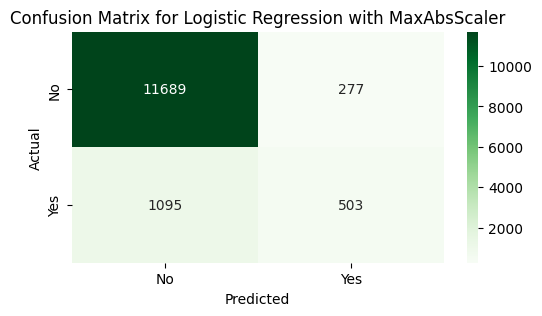

In [53]:
y_pred = clf.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression with MaxAbsScaler')
plt.show()


# **`sklearn.preprocessing.normalize`**

The `normalize` function scales input vectors to have a unit norm (length of 1).

## **Parameters**

- **`X`**: Input data, typically a 2D array or matrix.
- **`norm`**: The norm to use:
  - `'l2'`: Scale each vector to have a unit L2 norm (default).
  - `'l1'`: Scale each vector to have a unit L1 norm.
  - `'max'`: Scale each vector by its maximum absolute value.
- **`axis`**: Axis along which to normalize (default is 1, i.e., normalize each row).
- **`copy`**: Whether to copy the input data (default: `True`).
- **`return_norm`**: If `True`, also return the norms used for scaling (default: `False`).


### **Normilizer, SVC, Prediction, Classification Report and Confusion Matric**

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     11966
         1.0       0.00      0.00      0.00      1598

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



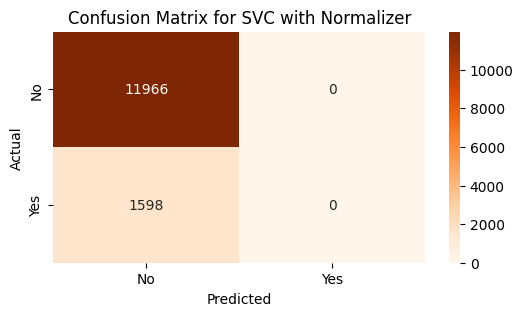

In [55]:
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

clf = SVC(kernel='linear', random_state=42)

clf.fit(X_train_normalized, y_train)

y_pred = clf.predict(X_test_normalized)

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC with Normalizer')
plt.show()


# **`MinMaxScaler` in `sklearn.preprocessing`**

`MinMaxScaler` scales features to a specified range, typically [0, 1].

## **Key Parameters**

- **`feature_range`**: Desired range of transformed data (default: `(0, 1)`).
- **`copy`**: Whether to copy the input data (default: `True`).


### **MinMaxScalar, RandomForestClassifier, Prediction, Classification Report and Confusion Matrix**

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     11966
         1.0       0.66      0.38      0.48      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



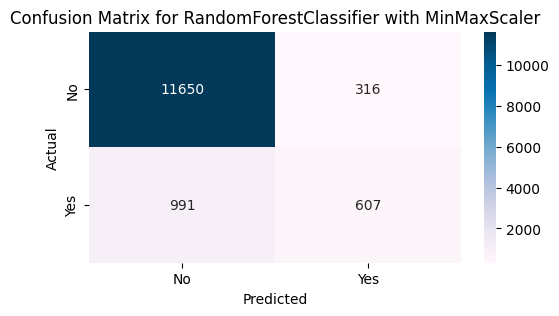

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RandomForestClassifier with MinMaxScaler')
plt.show()


# **Power Transformation in `sklearn.preprocessing`**

Power transformation is used to make data more Gaussian-like, stabilizing variance and making the data more normally distributed.

## **Available Transforms**

1. **`PowerTransformer`**

   - **Purpose**: Applies a power transformation to make data more Gaussian-like.
   - **Parameters**:
     - **`method`**: The transformation method:
       - `'yeo-johnson'`: Can handle zero and negative values (default).
       - `'box-cox'`: Requires strictly positive values.
     - **`standardize`**: Whether to standardize the data after transformation (default: `True`).
     - **`copy`**: Whether to copy the input data (default: `True`).

### **PowerTrnsformtion, RandomForest Classifier, Prediction, Classification Report, Confusion Matrix**

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     11966
         1.0       0.66      0.38      0.48      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



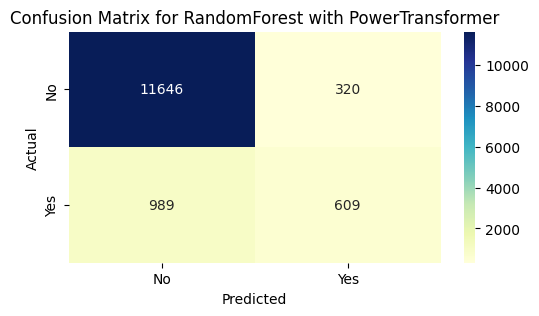

In [57]:
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier

power_transformer = PowerTransformer()
X_train_transformed = power_transformer.fit_transform(X_train)
X_test_transformed = power_transformer.transform(X_test)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RandomForest with PowerTransformer')
plt.show()


# **`QuantileTransformer`**

   - **Purpose**: Transforms features to follow a uniform or normal distribution.
   - **Parameters**:
     - **`output_distribution`**: Desired output distribution:
       - `'uniform'`: Uniform distribution.
       - `'normal'`: Normal distribution (default).
     - **`n_quantiles`**: Number of quantiles to use (default: `1000`).
     - **`copy`**: Whether to copy the input data (default: `True`).

### **QuantileTransformer, LogisticRegression, Prediction, Classification Report, and Confusion Mtrix**

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     11966
         1.0       0.67      0.29      0.40      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.63      0.67     13564
weighted avg       0.88      0.90      0.88     13564



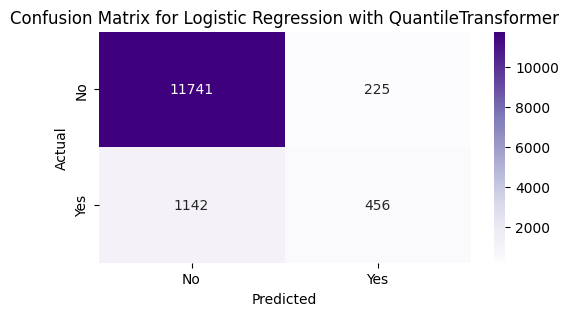

In [58]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegression

quantile_transformer = QuantileTransformer()
X_train_transformed = quantile_transformer.fit_transform(X_train)
X_test_transformed = quantile_transformer.transform(X_test)

clf = LogisticRegression(max_iter=1000, random_state=42)

clf.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression with QuantileTransformer')
plt.show()


# **`RobustScaler` in `sklearn.preprocessing`**

`RobustScaler` scales features using statistics that are robust to outliers. It scales features according to the interquartile range (IQR).

## **Key Parameters**

- **`center`**: Whether to center the data (default: `True`). Centers data by subtracting the median.
- **`scale`**: Whether to scale the data (default: `True`). Scales data by dividing by the IQR.
- **`copy`**: Whether to copy the input data (default: `True`).

### **RebustScaler, SVC, Prediction, Classification Report, Confusion Matrix**

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     11966
         1.0       0.00      0.00      0.00      1598

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



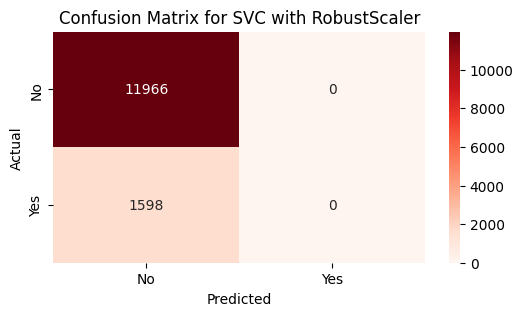

In [59]:
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC

robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

clf = SVC(random_state=42)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC with RobustScaler')
plt.show()

# **`MinMaxScaler` in `sklearn.preprocessing`**

`MinMaxScaler` scales features to a specified range, usually [0, 1].

## **Key Parameters**

- **`feature_range`**: Desired range of transformed data (default: `(0, 1)`).
- **`copy`**: Whether to copy the input data (default: `True`).

### **MinMaxScaler, SVC, Prediction, Classification Report and Confusion Matrix**

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     11966
         1.0       0.66      0.20      0.30      1598

    accuracy                           0.89     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



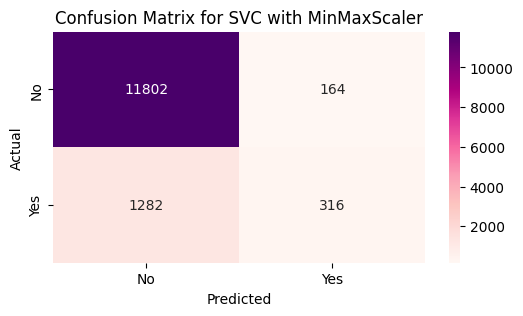

In [60]:
from sklearn.preprocessing import minmax_scale
from sklearn.svm import SVC
X_train_scaled = minmax_scale(X_train, feature_range=(0, 1))
X_test_scaled = minmax_scale(X_test, feature_range=(0, 1))

clf = SVC(random_state=42)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC with MinMaxScaler')
plt.show()


# **`StandardScaler` in `sklearn.preprocessing`**

`StandardScaler` standardizes features by removing the mean and scaling to unit variance.

## **Key Parameters**

- **`mean_`**: Mean value of each feature, calculated during fitting.
- **`scale_`**: Standard deviation of each feature, calculated during fitting.
- **`with_mean`**: Whether to center the data before scaling (default: `True`).
- **`with_std`**: Whether to scale data to unit variance (default: `True`).
- **`copy`**: Whether to copy the input data (default: `True`).


### **StandarScaler, Decision Tree, Prediction, Classification Report and Confusion Matric**

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     11966
         1.0       0.45      0.46      0.45      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



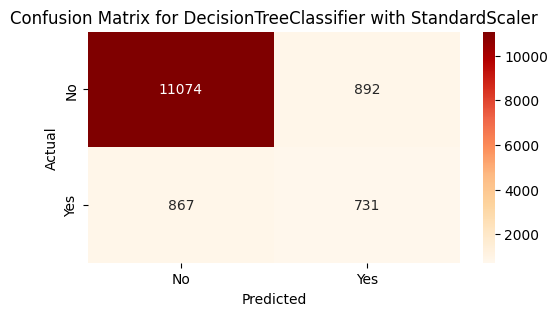

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for DecisionTreeClassifier with StandardScaler')
plt.show()


# **`GridSearchCV` in `sklearn.model_selection`**

`GridSearchCV` is used for hyperparameter tuning by exhaustively searching over a specified parameter grid.

## **Key Parameters**

- **`estimator`**: The model or pipeline to be tuned.
- **`param_grid`**: Dictionary with parameters names (`str`) as keys and lists of parameter settings to try as values.
- **`scoring`**: Metric to evaluate the model (default: `None`). E.g., `'accuracy'`, `'f1'`, etc.
- **`cv`**: Cross-validation splitting strategy (default: `5`). Number of folds in cross-validation.
- **`verbose`**: Controls the verbosity of the process (default: `0`).
- **`n_jobs`**: Number of jobs to run in parallel (default: `None`). `-1` means using all processors.
- **`return_train_score`**: If `True`, includes training scores in the results (default: `False`).


### **Optimization Using Grid Search previous Model 0.87 and See the Improvement in Heatmap**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters (RandomForestClassifier):
 {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Classification Report (Best RandomForestClassifier):
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     11966
         1.0       0.67      0.39      0.49      1598

    accuracy                           0.91     13564
   macro avg       0.80      0.68      0.72     13564
weighted avg       0.89      0.91      0.89     13564



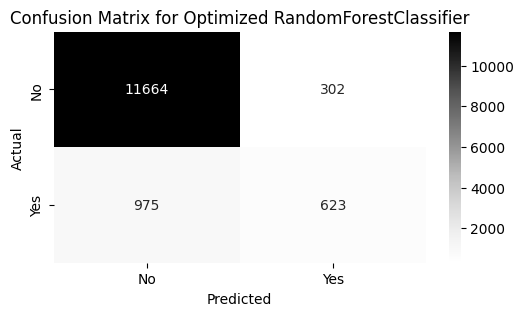

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 150],  
    'max_depth': [None, 10],     
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2], 
    'max_features': ['sqrt']     
}

rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf, 
                              param_grid=param_grid_rf, 
                              cv=5, 
                              scoring='accuracy', 
                              n_jobs=-1, 
                              verbose=2)

grid_search_rf.fit(X_train_scaled, y_train)

best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
print("Best Parameters (RandomForestClassifier):\n", best_params_rf)
y_pred_best_rf = best_model_rf.predict(X_test_scaled)
print("Classification Report (Best RandomForestClassifier):\n", classification_report(y_test, y_pred_best_rf, zero_division=0))

cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(6, 3))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Greys', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Optimized RandomForestClassifier')
plt.show()


# **`RandomizedSearchCV` in `sklearn.model_selection`**

`RandomizedSearchCV` is used for hyperparameter tuning by sampling a given number of parameter combinations from a specified parameter space.

## **Key Parameters**

- **`estimator`**: The model or pipeline to be tuned.
- **`param_distributions`**: Dictionary with parameters names (`str`) and distributions or lists of parameter settings to sample from.
- **`n_iter`**: Number of parameter settings to sample (default: `10`).
- **`scoring`**: Metric to evaluate the model (default: `None`). E.g., `'accuracy'`, `'f1'`, etc.
- **`cv`**: Cross-validation splitting strategy (default: `5`). Number of folds in cross-validation.
- **`verbose`**: Controls the verbosity of the process (default: `0`).
- **`n_jobs`**: Number of jobs to run in parallel (default: `None`). `-1` means using all processors.
- **`random_state`**: Seed for the random number generator (default: `None`).
- **`return_train_score`**: If `True`, includes training scores in the results (default: `False`).

### **Optimization Using Rndom Search previous Model 0.87 and See the Improvement in Heatmap**

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters (RandomForestClassifier):
 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Classification Report (Best RandomForestClassifier):
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     11966
         1.0       0.68      0.36      0.47      1598

    accuracy                           0.90     13564
   macro avg       0.80      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



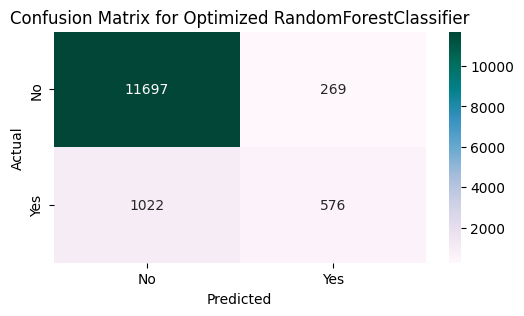

In [64]:
from sklearn.model_selection import RandomizedSearchCV



param_dist_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],      
    'min_samples_split': [2, 5],     
    'min_samples_leaf': [1, 2],      
    'max_features': ['sqrt', 'log2'] 
}

rf = RandomForestClassifier()
random_search_rf = RandomizedSearchCV(estimator=rf, 
                                       param_distributions=param_dist_rf, 
                                       n_iter=20,  # Reduced number of iterations
                                       cv=5, 
                                       scoring='accuracy', 
                                       n_jobs=-1, 
                                       verbose=2, 
                                       random_state=42)  # For reproducibility

random_search_rf.fit(X_train_scaled, y_train)

best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_

print("Best Parameters (RandomForestClassifier):\n", best_params_rf)

y_pred_best_rf = best_model_rf.predict(X_test_scaled)

print("Classification Report (Best RandomForestClassifier):\n", classification_report(y_test, y_pred_best_rf, zero_division=0))
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(6, 3))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='PuBuGn', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Optimized RandomForestClassifier')
plt.show()